In [1]:
import pandas as pd
import pickle as pkl
import tweepy
from nltk.tokenize import TweetTokenizer
from afinn import Afinn

In [2]:
tknzr = TweetTokenizer()
afinn = Afinn()

In [3]:
demDF = pd.read_csv("FullTextDemacrates.csv", index_col=0, encoding="latin1")
demRev = []
demNonSD = []

for index, row in demDF.iterrows():
    curText = row['Text'].lower()
    curText = tknzr.tokenize(curText)
    if 'tax' in curText or 'budget' in curText or 'daca' in curText or 'immigration' in curText or 'gop' in curText or 'dreamers' in curText or 'dreamer\'s' in curText or 'deal' in curText or 'vote' in curText or 'fund' in curText:
        if 'rt' not in curText :
            demRev.append(row) 
    elif 'rt' not in curText:
            demNonSD.append(row)
            
demRevDF = pd.DataFrame.from_dict(demRev)

demNonSDDF = pd.DataFrame.from_dict(demNonSD)
demNonSDP = []
demPScores = []
for index, row in demRevDF.iterrows():
    demPScores.append(afinn.score(row['Text']))

demRevDF['pscore'] = demPScores

for index, row in demNonSDDF.iterrows():
    demNonSDP.append(afinn.score(row['Text']))

demNonSDDF['pscore'] = demNonSDP

#demRevDF.to_csv('Revised_Demecrate.csv')

In [4]:
repDF = pd.read_csv("FullTextRepublicans.csv", index_col=0, encoding='latin1')
repRev = []
repNonSD = []

for index, row in repDF.iterrows():
    curText = row['Text'].lower()
    curText = tknzr.tokenize(curText)
    if 'tax' in curText or 'budget' in curText or 'daca' in curText or 'gop' in curText or 'dreamers' in curText or 'dreamers' in curText or 'deal' in curText or 'vote' in curText or 'fund' in curText or 'dems' in curText or 'shumershutdown' in curText or 'immigration' in curText:
        if 'rt' not in curText :
            repRev.append(row)
    elif 'rt' not in curText:
            repNonSD.append(row)

repRevDF = pd.DataFrame.from_dict(repRev)
repNonSDDF = pd.DataFrame.from_dict(repNonSD)

repPScores = []
repNonSDP = []

for index, row in repRevDF.iterrows():
    repPScores.append(afinn.score(row['Text']))

for index, row in repNonSDDF.iterrows():
    repNonSDP.append(afinn.score(row['Text']))
    
repRevDF['pscore'] = repPScores

repNonSDDF['pscore'] = repNonSDP
#repRevDF.to_csv('Revised_Republican.csv')

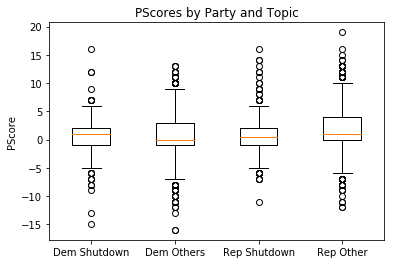

In [12]:
import matplotlib.pyplot as plt
plt.boxplot([demPScores, demNonSDP, repPScores, repNonSDP], labels=["Dem Shutdown", "Dem Others", "Rep Shutdown", "Rep Other"])
plt.ylabel('PScore')
plt.title('PScores by Party and Topic')
plt.savefig('politic_pscores.png')

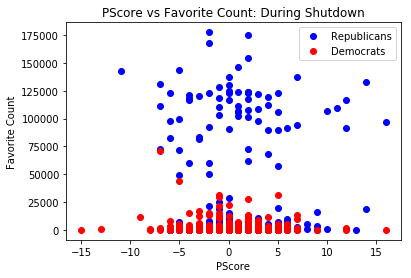

In [6]:
plt.plot(repRevDF['pscore'], repRevDF['Fav Count'], "bo", label = 'Republicans')
plt.plot(demRevDF['pscore'], demRevDF['Fav Count'], "ro", label = 'Democrats')
plt.xlabel('PScore')
plt.ylabel('Favorite Count')
plt.title('PScore vs Favorite Count: During Shutdown')
plt.legend()
plt.savefig('pscore_favorite.png')

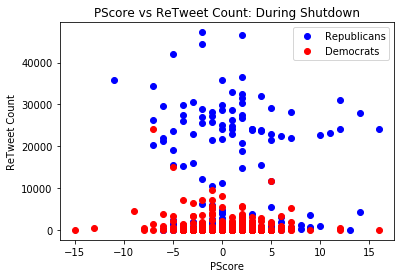

In [7]:
plt.plot(repRevDF['pscore'], repRevDF['Re Count'], "bo", label = 'Republicans')
plt.plot(demRevDF['pscore'], demRevDF['Re Count'], "ro", label = 'Democrats')
plt.xlabel('PScore')
plt.ylabel('ReTweet Count')
plt.title('PScore vs ReTweet Count: During Shutdown')
plt.legend()
plt.savefig('pscore_retweet.png')

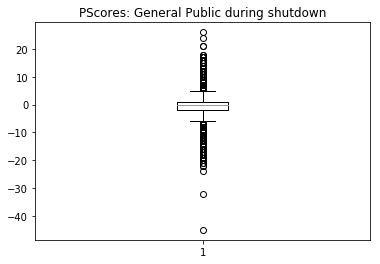

In [9]:
duringDF = pd.read_csv("duringTweets.csv", index_col=0, encoding="latin1")
duringDF

scores = duringDF['pscores']
scores


plt.boxplot(scores,)
plt.title('PScores: General Public during shutdown')
#plt.show()
plt.savefig('pscores_gp_during.png')

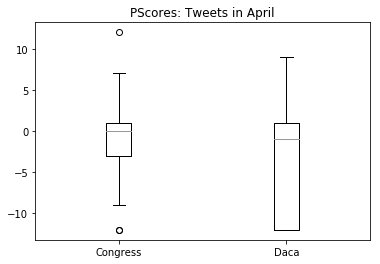

In [10]:
govDF = pd.read_csv("currentTweetsCongress.csv", index_col=0, encoding="latin1")
dacaDF = pd.read_csv("currentTweetsDACA.csv", index_col=0, encoding="latin1")

congressPscore = []
dacaPscore = []

for index, row in govDF.iterrows():
    congressPscore.append(afinn.score(row['Text']))

for index, row in dacaDF.iterrows():
    dacaPscore.append(afinn.score(row['Text']))
    
govDF['pscore'] = congressPscore
dacaDF['pscore'] = dacaPscore

#govDF.to_csv('currentCongressP.csv')
#dacaDF.to_csv('currentDACAP.csv')

plt.boxplot([congressPscore, dacaPscore], labels=["Congress", "Daca"])
plt.title('PScores: Tweets in April')
plt.savefig('pscores_topics_april.png')

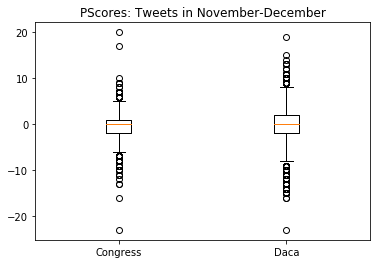

In [11]:
govDF = pd.read_csv("BeforeTweetsGov.csv", index_col=0, encoding="latin1")
dacaDF = pd.read_csv("BeforeTweets.csv", index_col=0, encoding="latin1")

congressPscore = []
dacaPscore = []

for index, row in govDF.iterrows():
    congressPscore.append(afinn.score(row['Text']))

for index, row in dacaDF.iterrows():
    dacaPscore.append(afinn.score(row['Text']))
    
govDF['pscore'] = congressPscore
dacaDF['pscore'] = dacaPscore

#govDF.to_csv('BeforeCongressP.csv')
#dacaDF.to_csv('BeforeDACAP.csv')

plt.boxplot([congressPscore, dacaPscore], labels=["Congress", "Daca"])
plt.title('PScores: Tweets in November-December')
plt.savefig('pscores_topics_nov_dec')